# Segnale non difettoso



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os


def getSignalFromFile(file_path):
    """Legge un segnale da un file di testo."""
    signal = np.loadtxt(file_path)
    return signal

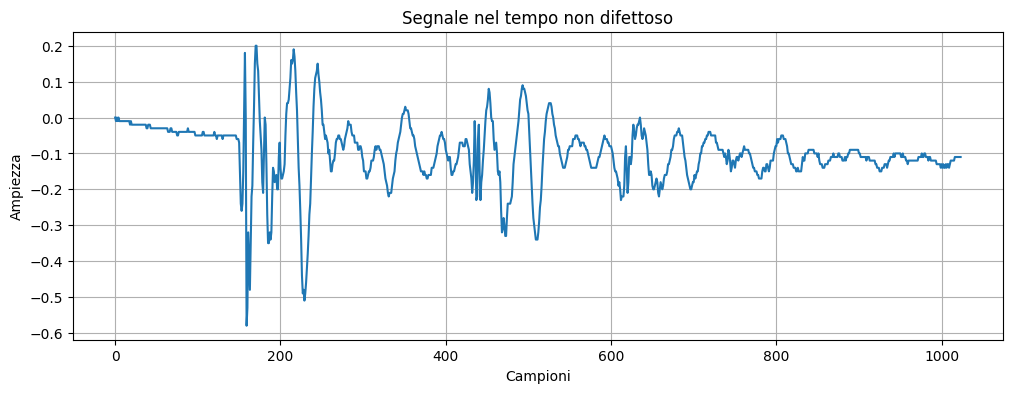

In [ ]:


# Leggi il segnale dal file
file_path = '../dataset/test_object_1_1mm/A/A (2).txt'
signal = np.loadtxt(file_path)

# Crea l'asse temporale (1024 campioni)
n_samples = len(signal)
time = np.arange(n_samples)

# Oppure se conosci la frequenza di campionamento
# fs = 1000  # Hz (esempio)
# time = np.arange(n_samples) / fs

# Rappresenta il segnale
plt.figure(figsize=(12, 4))
plt.plot(time, signal)
plt.xlabel('Campioni')
plt.ylabel('Ampiezza')
plt.title('Segnale nel tempo non difettoso')
plt.grid(True)
plt.show()

# Segnale difettoso



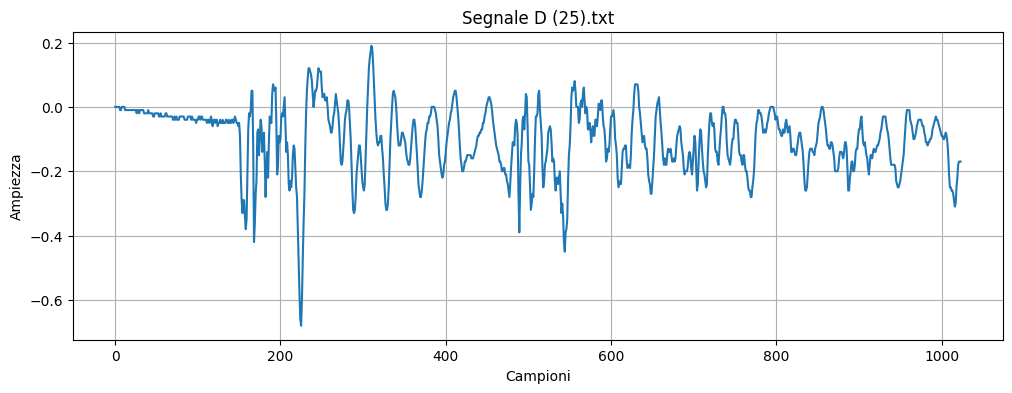

In [18]:
import sys
sys.path.append('../utils')
from getIndexesFromNumber import getIndexesFromNumber

# Leggi il segnale dal file
fileName = getIndexesFromNumber(145) + '.txt'
file_path = '../dataset/test_object_1_1mm/D/' + fileName

signalWithDefect = np.loadtxt(file_path)

# Crea l'asse temporale (1024 campioni)
n_samples = len(signalWithDefect)
time = np.arange(n_samples)

# Oppure se conosci la frequenza di campionamento
# fs = 1000  # Hz (esempio)
# time = np.arange(n_samples) / fs

# Rappresenta il segnale
plt.figure(figsize=(12, 4))
plt.plot(time, signalWithDefect)
plt.xlabel('Campioni')
plt.ylabel('Ampiezza')
plt.title(f'Segnale {fileName}')
plt.grid(True)
plt.show()

# Analisi Tempo Frequenza

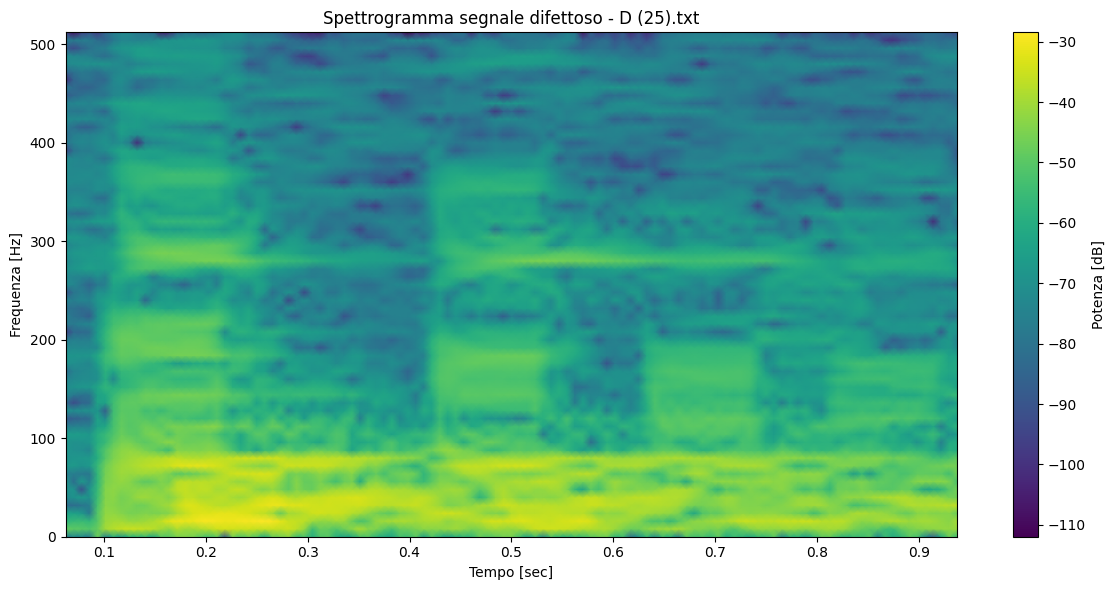

In [ ]:
from scipy import signal as sig

# Parametri per lo spettrogramma
fs = 1024  # Frequenza di campionamento 
nperseg = 128  # Lunghezza della finestra
noverlap = 120  # Overlap tra finestre

# Calcola lo spettrogramma
f, t, Sxx = sig.spectrogram(signalWithDefect, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Visualizza lo spettrogramma
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.ylabel('Frequenza [Hz]')
plt.xlabel('Tempo [sec]')
plt.title(f'Spettrogramma segnale difettoso - {fileName}')
plt.colorbar(label='Potenza [dB]')
plt.tight_layout()
plt.show()

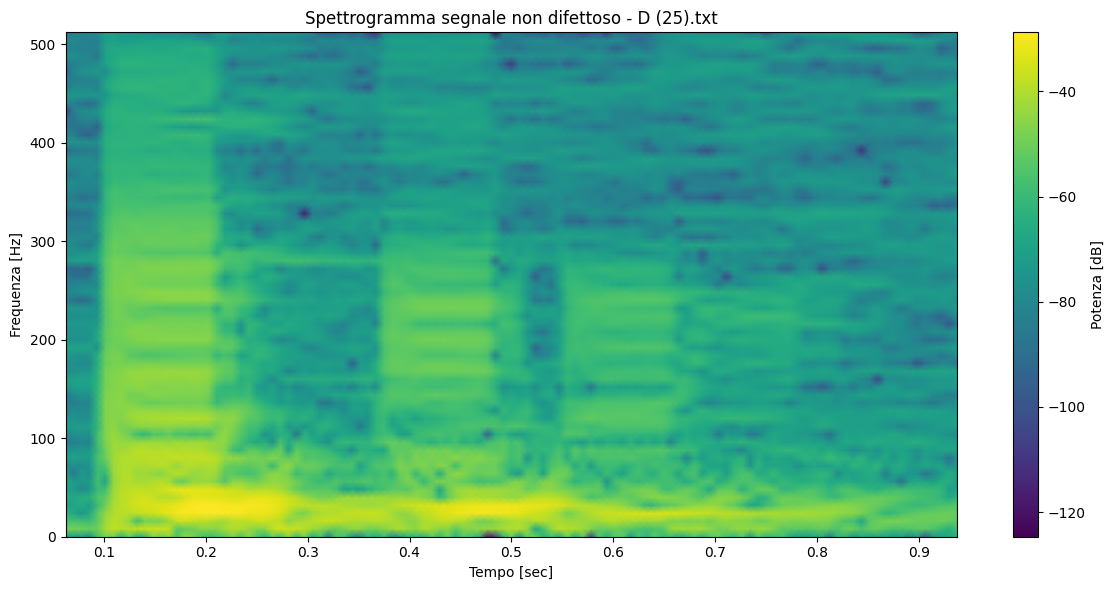

In [5]:

# Calcola lo spettrogramma
f, t, Sxx = sig.spectrogram(signal, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Visualizza lo spettrogramma
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
plt.ylabel('Frequenza [Hz]')
plt.xlabel('Tempo [sec]')
plt.title(f'Spettrogramma segnale non difettoso - {fileName}')
plt.colorbar(label='Potenza [dB]')
plt.tight_layout()
plt.show()

# Trasformazione in matrice bidimensionale di uno spettrogramma


In [6]:
# Funzione per convertire un segnale in spettrogramma (matrice 2D)
def signal_to_spectrogram(signal, fs=1024, nperseg=128, noverlap=120):
    """
    Converte un segnale 1D in uno spettrogramma (matrice 2D)
    
    Args:
        signal: array 1D del segnale temporale
        fs: frequenza di campionamento
        nperseg: lunghezza della finestra
        noverlap: overlap tra finestre
    
    Returns:
        Sxx_db: matrice 2D dello spettrogramma in dB
    """
    f, t, Sxx = sig.spectrogram(signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
    Sxx_db = 10 * np.log10(Sxx + 1e-10)  # Converti in dB, evita log(0)
    return Sxx_db



In [7]:
# Test su un segnale
spec_matrix = signal_to_spectrogram(signal, fs=1024)
print(f"Shape dello spettrogramma: {spec_matrix.shape}")
print(f"Dimensioni: {spec_matrix.shape[0]} bin di frequenza × {spec_matrix.shape[1]} bin temporali")
print(f"Range valori: [{spec_matrix.min():.2f}, {spec_matrix.max():.2f}] dB")

Shape dello spettrogramma: (65, 113)
Dimensioni: 65 bin di frequenza × 113 bin temporali
Range valori: [-99.99, -28.79] dB


In [9]:
np.savetxt('spectrogram_matrix.txt', spec_matrix)


## Creazione e Salvataggio dataset di spettrogrammi

Ora processiamo tutti i file del dataset e creiamo matrici 2D per ogni segnale

In [33]:

for i in range(1041,1601):
    fileName = getIndexesFromNumber(i)
    letter = fileName.split()[0]
    file_path = '../dataset/test_object_1_1mm/' + letter + '/' + fileName + '.txt'
    print(file_path)
    signal = getSignalFromFile(file_path)
    spec_matrix = signal_to_spectrogram(signal)
    output_dir = '../dataset/test_object_1_1mm_spectrograms/' + letter + '/'
    os.makedirs(output_dir, exist_ok=True)
    np.savetxt(output_dir + fileName + '.txt', spec_matrix)

    

../dataset/test_object_1_1mm/ZAA/ZAA (1).txt
../dataset/test_object_1_1mm/ZAA/ZAA (2).txt
../dataset/test_object_1_1mm/ZAA/ZAA (3).txt
../dataset/test_object_1_1mm/ZAA/ZAA (4).txt
../dataset/test_object_1_1mm/ZAA/ZAA (5).txt
../dataset/test_object_1_1mm/ZAA/ZAA (6).txt
../dataset/test_object_1_1mm/ZAA/ZAA (7).txt
../dataset/test_object_1_1mm/ZAA/ZAA (8).txt
../dataset/test_object_1_1mm/ZAA/ZAA (9).txt
../dataset/test_object_1_1mm/ZAA/ZAA (10).txt
../dataset/test_object_1_1mm/ZAA/ZAA (11).txt
../dataset/test_object_1_1mm/ZAA/ZAA (12).txt
../dataset/test_object_1_1mm/ZAA/ZAA (13).txt
../dataset/test_object_1_1mm/ZAA/ZAA (14).txt
../dataset/test_object_1_1mm/ZAA/ZAA (15).txt
../dataset/test_object_1_1mm/ZAA/ZAA (16).txt
../dataset/test_object_1_1mm/ZAA/ZAA (17).txt
../dataset/test_object_1_1mm/ZAA/ZAA (18).txt
../dataset/test_object_1_1mm/ZAA/ZAA (19).txt
../dataset/test_object_1_1mm/ZAA/ZAA (20).txt
../dataset/test_object_1_1mm/ZAA/ZAA (21).txt
../dataset/test_object_1_1mm/ZAA/ZAA (22).t

## Salvataggio del dataset

Salviamo il dataset preprocessato per riutilizzarlo successivamente